### (0 баллов) Считываем данные

In [4]:
#МирзоянВика
import scipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()
dat = pd.read_csv('C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv')
dat.head()

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


Каждая квартира имеет 13 признаков:

In [6]:
X = dataset['data']
X[:10]
X[np.where(np.isnan(X))] = 0.0

In [7]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [9]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = model.predict(X_test)
y_pred

array([27.1764036 , 16.66457617,  3.26674936, 24.80553966, 25.82532581,
       28.60277185, 25.70313463, 26.14363378, 18.26946339, 29.0600212 ,
       13.60274317,  8.506512  , 20.27676149, 33.00173277, 21.73274801,
       15.58363324, 18.44372517,  7.57302554, 22.31363015, 13.28568703,
       16.89047757, 15.27879518, 43.23286686,  9.52971834, 29.40142465,
       17.55619107, 12.20662889, 29.25705589, 20.44779368, 32.20992438,
       11.95379927, 22.73119255, 39.36877034, 19.9447675 , 23.85772954,
       24.35887353, 22.16843347, 25.28394877, 24.39258665, 21.86292356,
       14.6201663 , 28.91804652, 17.29994626, 25.59040221, 22.86721406,
       23.24328256, 25.95464122,  3.09684581, 29.93222153, 25.76180737,
       25.30363924])

### (2 балл) Валидация результата

Напишите свою функцию MSE и посчитайте своей результат на тестовой части.

In [14]:
def MSE(y_real, y_pred):
    return ((y_real-y_pred)**2).sum()/len(y_real)

In [15]:
MSE(y_test, y_pred)

31.371713986493916

Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [20]:
y_pred = np.mean(y_train)


In [19]:
MSE(y_train, y_pred)
#Ошибка получилась намного большей

85.2743989373264

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

32.02824835387586


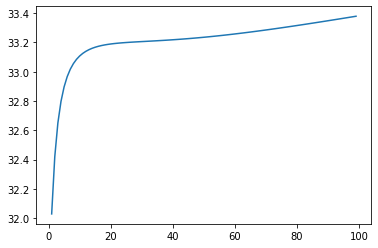

In [17]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X_train, y_train)
model_pred=model.predict(X_test)
print(MSE(y_test,model_pred))

def regularize(alph):
    model = Ridge(alph)
    model.fit(X_train, y_train)
    model_pred=model.predict(X_test)
    return MSE(y_test, model_pred)
alphas=list(range(1,100))
plt.plot(alphas, list(map(regularize,alphas)))
axes=plt.gca()



Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка?

In [18]:
#Несмотря на то что при регуляризации ошибка увеличилась, она помогает минимизировать сложность модели (у нас много признаков, соответственно, много коэффициентов)

In [ ]:
#Чтобы ошибка была минимальной, нужно выбрать alpha~1, при этом ошибка будет~32